## Deep Neural Network (DNN) Classifier - Iris
We will build a relataively simple neuran net to classify IRIS dataset 

## Step 1 - About IRIS Dataset

Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to statistically classify flowers. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest—we're going to classify Iris flowers based on the length and width measurements of their [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal).

The Iris genus entails about 300 species, but our program will only classify the following three:

* Iris setosa
* Iris virginica
* Iris versicolor

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Iris setosa</a> (by <a href="https://commons.wikimedia.org/wiki/User:Radomil">Radomil</a>, CC BY-SA 3.0), <a href="https://commons.wikimedia.org/w/index.php?curid=248095">Iris versicolor</a>, (by <a href="https://commons.wikimedia.org/wiki/User:Dlanglois">Dlanglois</a>, CC BY-SA 3.0), and <a href="https://www.flickr.com/photos/33397993@N05/3352169862">Iris virginica</a> (by <a href="https://www.flickr.com/photos/33397993@N05">Frank Mayfield</a>, CC BY-SA 2.0).<br/>&nbsp;
  </td></tr>
</table>

Fortunately, someone has already created a [data set of 120 Iris flowers](https://en.wikipedia.org/wiki/Iris_flower_data_set) with the sepal and p

In [1]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


Running in Google COLAB :  False


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


import tensorflow as tf
from tensorflow import keras

## Step 2 : Read Data

In [3]:
import os

# data_location_local = '../data/iris/keras/iris.csv'

data_location = "https://s3.amazonaws.com/elephantscale-public/data/iris/keras/iris.csv"
data_location_local = keras.utils.get_file(fname=os.path.basename(data_location),
                                           origin=data_location)

iris = pd.read_csv(data_location_local)

iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

iris

16384/4612 [==========================================================================================================] - 0s 0us/step


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step 3 : Shape Data

### 3.1 - Select columns

In [4]:
input_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = iris [input_columns]
y = iris[['Species']]

print (x.head())
print('-----')
print (y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
-----
       Species
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


### 3.2 - Encode Labels
Our output labels are strings like 'Iris-setosa' and 'Iris-virginica' ..etc.  
These are called **categorical variables**  
We need to change these to numbers  
This is called **encoding**

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y.values) ## need y.values which is an array
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3.3 - Create train/test split

In [6]:
from sklearn.model_selection import train_test_split

# supply 'y1' (encoded labels)
x_train,x_test, y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=0) 

print ("x_train.shape : ", x_train.shape)
print ("y_train.shape : ", y_train.shape)
print ("x_test.shape : ", x_test.shape)
print ("y_test.shape : ", y_test.shape)

x_train.shape :  (120, 4)
y_train.shape :  (120,)
x_test.shape :  (30, 4)
y_test.shape :  (30,)


## Step 4 : Build the Model
Since this is a classifier, here is how we are going to build the neural network
- Neurons in Input layer  = input dimensions (4 here)
- Neurons in hidden layer = ???
- Neurons in Output layer = output classes (3 here)
- Output activation is 'softmax'

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:40%"/>

input_dim :  4 , output classes :  3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
None


2022-06-14 07:28:09.024169: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


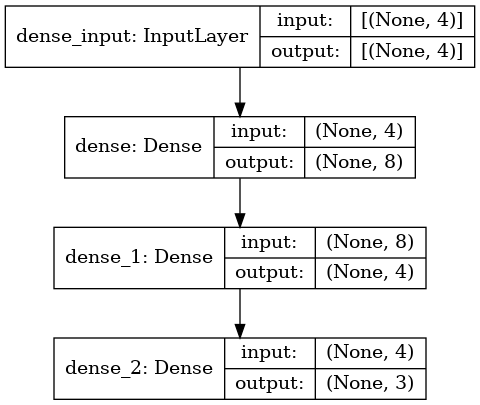

In [7]:
input_dim = len(input_columns)
output_clases = 3 
print ("input_dim : ", input_dim, ", output classes : ", output_clases)

## TODO : construct the network
##     - number of neurons for 'intput_layer' = input_dim
##     - number of neurons for 'hidden_1' layer = 8  (start with 8 for now)
##     - number of neurons for 'output_layer' = output_classes

## TODO : set activation functions as follows 
##     - activation function for both 'ainput_layer' and 'hidden_1' = tf.nn.relu
##     - activation function for final 'output_layer' = tf.nn.softmax
model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=8, activation='relu', input_dim=input_dim),
            tf.keras.layers.Dense(units=4, activation='relu'),
            tf.keras.layers.Dense(units=output_clases,  activation='softmax') # softmax for 3 classes, can use sigmoid for binary
            ])

# loss = 'sparse_categorical_crossentropy'  or 'categorical_crossentropy'
model.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(), # or 'adam', 
                 metrics=['accuracy'])

print (model.summary())
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Step 5 : Tensorboard

In [8]:
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = 'classification-iris'

# timestamp  = datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S")

tb_top_level_dir= '/tmp/tensorboard-logs'

tb_app_dir = os.path.join (tb_top_level_dir, app_name)

tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))


print ("Saving TB logs to : " , tb_logs_dir)

#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, write_graph=True, 
                                                      write_images=True, histogram_freq=1)

## This will embed Tensorboard right here in jupyter!
%load_ext tensorboard
%tensorboard --logdir $tb_logs_dir

Saving TB logs to :  /tmp/tensorboard-logs/classification-iris/07-28-10


2022-06-14 07:28:10.286637: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-14 07:28:10.286963: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-14 07:28:10.288249: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


## Step 6 : Train

In [9]:
%%time

## TODO start with 100 epochs
epochs = 100

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1,
              callbacks=[tensorboard_callback])

print ("training done.")

training starting ...
Epoch 1/100


2022-06-14 07:28:15.505729: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3/3 [==============================] - ETA: 0s - loss: 3.1237 - accuracy: 0.3438

2022-06-14 07:28:16.204006: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-14 07:28:16.204280: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-14 07:28:16.208994: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-06-14 07:28:16.214041: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-06-14 07:28:16.227905: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /tmp/tensorboard-logs/classification-iris/07-28-10/train/plugins/profile/2022_06_14_07_28_16

2022-06-14 07:28:16.229131: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /tmp/tensorboard-logs/classification-iris/07-28-10/train/plugins/profile/2022_06_14_07_28_16/0b7a7e0c46dd.trace.json.gz
2022-06-14 07:28:16.242021: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creat

3/3 [==============================] - 1s 152ms/step - loss: 3.1237 - accuracy: 0.3438 - val_loss: 3.3882 - val_accuracy: 0.2500
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 2.9256 - accuracy: 0.3438 - val_loss: 3.1967 - val_accuracy: 0.2500
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 2.7440 - accuracy: 0.3438 - val_loss: 3.0098 - val_accuracy: 0.2500
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 2.5617 - accuracy: 0.3438 - val_loss: 2.8296 - val_accuracy: 0.2500
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 2.3715 - accuracy: 0.3438 - val_loss: 2.6598 - val_accuracy: 0.2500
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 2.2113 - accuracy: 0.3438 - val_loss: 2.4977 - val_accuracy: 0.2500
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 2.0539 - accuracy: 0.3438 - val_loss: 2.3474 - val_accuracy: 0.2500
Epoch 8/100
3/3 [==============

## Step 7 : Plot History

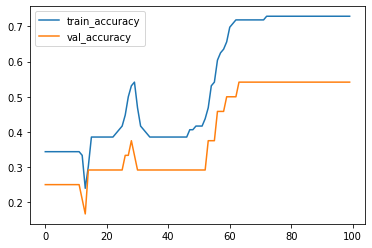

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 : Predict

In [11]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

predictions = model.predict(x_test)
predictions

array([[ 0.139,  0.204,  0.657],
       [ 0.227,  0.302,  0.471],
       [ 0.580,  0.290,  0.130],
       [ 0.139,  0.195,  0.667],
       [ 0.507,  0.323,  0.170],
       [ 0.121,  0.200,  0.679],
       [ 0.524,  0.313,  0.163],
       [ 0.194,  0.317,  0.488],
       [ 0.195,  0.287,  0.519],
       [ 0.218,  0.338,  0.444],
       [ 0.165,  0.239,  0.595],
       [ 0.204,  0.325,  0.470],
       [ 0.201,  0.318,  0.481],
       [ 0.194,  0.291,  0.515],
       [ 0.193,  0.312,  0.495],
       [ 0.489,  0.334,  0.177],
       [ 0.194,  0.314,  0.492],
       [ 0.204,  0.318,  0.477],
       [ 0.475,  0.333,  0.192],
       [ 0.550,  0.300,  0.150],
       [ 0.160,  0.247,  0.594],
       [ 0.197,  0.316,  0.487],
       [ 0.478,  0.333,  0.189],
       [ 0.474,  0.335,  0.191],
       [ 0.174,  0.260,  0.565],
       [ 0.562,  0.297,  0.141],
       [ 0.497,  0.320,  0.183],
       [ 0.210,  0.335,  0.455],
       [ 0.243,  0.350,  0.407],
       [ 0.486,  0.325,  0.188]], dtype=flo

### Understanding Predictions
In the above output, for each test input, the softmax layer, produces 3 numbers.  
These numbers are probabilities.  If you add them up, you will get 1.0  
We want to choose the output that has the highest probability.  

For example `(0.03086184, 0.33362046, 0.6355177)` means  
- class 1 has prob of 0.03  or 3%
- class 2 has prob of 0.33  or 33%
- class 3 has prob of 0.63  or 63%

So we choose the class with highest probability as prediction : class 3


We can get class predictions directly as follows

In [12]:
## Use 'predict_classes' instead of 'predict'
y_pred = np.argmax(predictions, axis=-1)
print ('prediction classes: ', y_pred)

prediction classes:  [2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 2 2 0]


## Step 9 : Evaluate the model

### 9.1 - Print out metrics

In [13]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(x_test, y_test, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.2f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.84
Metric : accuracy = 0.57


### 9.2 - Confusion Matrix
Since this is a classification problem, confusion matrix is very effective way to evaluate our model

In [14]:
## plain confusion matrix 

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels = [0,1,2])
cm


array([[11,  0,  0],
       [ 0,  0, 13],
       [ 0,  0,  6]])

[]

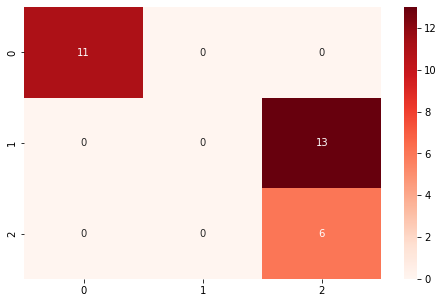

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

### 9.3 - Metrics calculated from Confusion Matrix

In [16]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(y_test, y_pred, output_dict=True))

{'0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 11},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 13},
 '2': {'f1-score': 0.4799999999999999,
       'precision': 0.3157894736842105,
       'recall': 1.0,
       'support': 6},
 'accuracy': 0.5666666666666667,
 'macro avg': {'f1-score': 0.49333333333333335,
               'precision': 0.4385964912280702,
               'recall': 0.6666666666666666,
               'support': 30},
 'weighted avg': {'f1-score': 0.4626666666666666,
                  'precision': 0.4298245614035088,
                  'recall': 0.5666666666666667,
                  'support': 30}}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### TODO : Intepret confusion matrix
Instructor will walk you through the matrix.  
Answer these questions
- which class is classified correctly mostly
- which class is classified incorrectly?

## Step 10 : Improve the Model

Inspect the following
- What is the metric 'accuracy' in step 9.1
- And verify this with tensorboard (port 6066)

Most likely, we didn't get a great accuracy.  
How can we improve it?

**Try the following ideas** 

- **Idea-1 : Increase neurons in hidden layer**  
  - In Step-4, increase hidden layer neurons from 8 --> 64  
  - Click 'Kernel --> Restart and Run all Cells'  
  - Hopefully you should see improvement in the accuracy.  
  - Check  accuracy metrics / confusion matrix / tensorboard

## Exercise 1 : Mismatched Output Classes

In **Step-4**  when defining the network, change the number of neurons in the **final softmax layer to 2**.

Re-run this notebook.

What kind of error do you get?  This is a good error to remember :-) 

## Step 11: Compact Code
Here is the compact code : [classification-1b-iris-compact.ipynb](classification-1b-iris-compact.ipynb)